### United States of America is one of the most diverse countries in the world and a developed nation. Thus, a French artist thought it would be a good idea to launch his museum in the U.S.A. He intends to move to a lively part of the country with low crime rates and a high population in order to prevent his art works from getting stolen while still having access to a large audience. The objective of the project is use a foursquare credentials to build a map while using other databases to carry out a research that will provide the the French artist with the safest lively location in the United States to showcase his art works. This project will utilize data science methodology in approaching the business problem at hand.

### The dataset to be used for the project is the top 100 most populous cities in U.S.A with their respective crime rates. With the use of data analysis technique via python, the safest lively city will be found which is one of the top 100 most populous cities with the least crime rate. Then, foursquare will be used to analyze the city better by looking into which neighborhood will be perfect for the French artist to build his museum and store his art collection. This will be based on how lively each location is based on the number of people who attend events in this location. One major criteria for the cities is: the city must have a population of 1,000,000 or more.

In [1]:
## First, we import the data to be used to analyze the crime rate per 100,000 in the top ten most populous cities
import pandas as pd
df = pd.read_excel('/resources/data/Crime_rate_in_USA.xlsx')
df.head()

,State,City,Population,Total,Murder andNonnegligent Manslaughter,Rape1,Robbery,Aggravated Assault,Total.1,Burglary,Larceny-Theft,Motor Vehicle Theft,Unnamed: 12
0,Alabama,Mobile3,248431,740.25,20.13,57.16,177.11,485.85,5453.83,1216.84,3730.21,506.78,22.94
1,Alaska,Anchorage,296188,1203.29,9.12,132.01,262.67,799.49,5415.82,748.17,3619.66,1047.98,20.93
2,Arizona,Chandler,249355,259.47,2.01,52.13,56.95,148.38,2329.61,314.41,1866.01,149.18,NaN
3,Arizona,Gilbert,242090,85.51,2.07,16.11,21.07,46.26,1385.85,192.49,1137.59,55.76,12.39
4,Arizona,Glendale,249273,488.22,4.81,38.91,192.96,251.53,4530.37,637.45,3426.36,466.56,19.26


In [2]:
df.rename(columns={"Rape1":"Rape", "Unnamed: 12": "Arson"}, inplace = True)

In [3]:
df.head()

,State,City,Population,Total,Murder andNonnegligent Manslaughter,Rape,Robbery,Aggravated Assault,Total.1,Burglary,Larceny-Theft,Motor Vehicle Theft,Arson
0,Alabama,Mobile3,248431,740.25,20.13,57.16,177.11,485.85,5453.83,1216.84,3730.21,506.78,22.94
1,Alaska,Anchorage,296188,1203.29,9.12,132.01,262.67,799.49,5415.82,748.17,3619.66,1047.98,20.93
2,Arizona,Chandler,249355,259.47,2.01,52.13,56.95,148.38,2329.61,314.41,1866.01,149.18,NaN
3,Arizona,Gilbert,242090,85.51,2.07,16.11,21.07,46.26,1385.85,192.49,1137.59,55.76,12.39
4,Arizona,Glendale,249273,488.22,4.81,38.91,192.96,251.53,4530.37,637.45,3426.36,466.56,19.26


In [4]:
## The crimes not associated with regular museum thefts/heists were removed from the table
df.drop(['Total', 'Murder andNonnegligent Manslaughter', 'Rape', 'Total.1', 'Motor Vehicle Theft', 'Arson'], axis = 1, inplace = True)
df.head()

,State,City,Population,Robbery,Aggravated Assault,Burglary,Larceny-Theft
0,Alabama,Mobile3,248431,177.11,485.85,1216.84,3730.21
1,Alaska,Anchorage,296188,262.67,799.49,748.17,3619.66
2,Arizona,Chandler,249355,56.95,148.38,314.41,1866.01
3,Arizona,Gilbert,242090,21.07,46.26,192.49,1137.59
4,Arizona,Glendale,249273,192.96,251.53,637.45,3426.36


In [5]:
df.columns

Index(['State', 'City', 'Population', 'Robbery', 'Aggravated Assault',
       'Burglary', 'Larceny-Theft'],
      dtype='object')

In [6]:
## A new column was created with the summation of all the columns representing crimes
df['Total'] = df['Robbery'] + df['Aggravated Assault'] + df['Burglary'] + df['Larceny-Theft']

In [7]:
df.head()

,State,City,Population,Robbery,Aggravated Assault,Burglary,Larceny-Theft,Total
0,Alabama,Mobile3,248431,177.11,485.85,1216.84,3730.21,5610.01
1,Alaska,Anchorage,296188,262.67,799.49,748.17,3619.66,5429.99
2,Arizona,Chandler,249355,56.95,148.38,314.41,1866.01,2385.75
3,Arizona,Gilbert,242090,21.07,46.26,192.49,1137.59,1397.41
4,Arizona,Glendale,249273,192.96,251.53,637.45,3426.36,4508.30


In [8]:
## The dataset was further cleaned to preserve just the total number of crimes
df.drop(['Robbery', 'Aggravated Assault', 'Burglary', 'Larceny-Theft'], axis = 1, inplace = True)

In [9]:
df.columns

Index(['State', 'City', 'Population', 'Total'], dtype='object')

In [10]:
## we only considered populations greater than 1,000,000 for analysis since that is the criteria
df = df[df.Population >= 1000000]

In [11]:
df.head()

,State,City,Population,Total
6,Arizona,Phoenix,1644177,3887.18
16,California,Los Angeles,4007147,2749.99
21,California,San Diego,1424116,1807.30
23,California,San Jose,1037529,2008.62
41,Illinois,Chicago,2706171,3845.58


In [12]:
df = df.sort_values(['Total'], ascending=True)

In [13]:
df = df.reset_index()

In [14]:
df.head()

,index,State,City,Population,Total
0,21,California,San Diego,1424116,1807.30
1,66,New York,New York,8616333,1889.96
2,23,California,San Jose,1037529,2008.62
3,16,California,Los Angeles,4007147,2749.99
4,59,Nevada,Las Vegas Metropolitan Police Department,1627244,2966.98


In [15]:
df.drop(['index'], axis = 1, inplace = True)

In [16]:
df.head()

,State,City,Population,Total
0,California,San Diego,1424116,1807.30
1,New York,New York,8616333,1889.96
2,California,San Jose,1037529,2008.62
3,California,Los Angeles,4007147,2749.99
4,Nevada,Las Vegas Metropolitan Police Department,1627244,2966.98


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


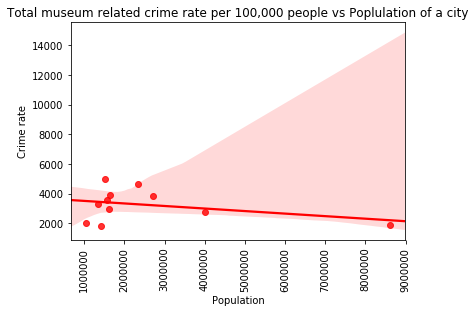

In [18]:
## Plot of Total crimes vs Population to see if there's a correlation
sns.regplot('Population', 'Total', data = df, marker = 'o', color = 'red')
plt.title('Total museum related crime rate per 100,000 people vs Poplulation of a city')
plt.xlabel("Population")
plt.ylabel("Crime rate") 
plt.xticks(rotation = 90)
plt.show()

In [19]:
from scipy.stats import pearsonr
corr, other = pearsonr(df.Population, df.Total)
print(corr)

-0.3453858231203566


### The correlation coefficient is weak which suggests that there is no relationship between population and crime rates for each city so we shall explore the city with the least crime rate which is San Diego 

In [20]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## It turns out that San Diego, CA is one of the most populous cities with a low crime rate related to museum/artifacts crimes so we shall use foursquare to explore the city.

### We shall now explore San Diego as a city and find out the perfect location

In [21]:
sd_data = pd.read_excel('/resources/data/san_diego_neighborhoods.xlsx')
sd_data.head()

,Neighborhood,Latitude,Longitude
0,Allied Gardens,32.8003,-117.0853
1,Alta Vista,32.6926,-117.0684
2,Balboa Park,32.7341,-117.1446
3,Bario Logan,32.6930,-117.1368
4,Bay Ho,32.8242,-117.2176


In [22]:
CLIENT_ID = 'IRCIA5AG1PRCNGUIBX32NXE3CPKJ32SRBLJZXTS4COAFW13D' # your Foursquare ID
CLIENT_SECRET = 'HKNPYOUJYLWJMRS2WSI00FK4FRHGJUW0TMA4Q4QTII1IBK5T' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IRCIA5AG1PRCNGUIBX32NXE3CPKJ32SRBLJZXTS4COAFW13D
CLIENT_SECRET:HKNPYOUJYLWJMRS2WSI00FK4FRHGJUW0TMA4Q4QTII1IBK5T


In [23]:
city = df.loc[0, 'City']
city

'San Diego'

In [24]:
address = city
geolocator = Nominatim(user_agent="sd_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Diego are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Diego are 32.7174209, -117.1627714.


In [25]:
radius = 500
LIMIT = 100
search_query = city
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=IRCIA5AG1PRCNGUIBX32NXE3CPKJ32SRBLJZXTS4COAFW13D&client_secret=HKNPYOUJYLWJMRS2WSI00FK4FRHGJUW0TMA4Q4QTII1IBK5T&ll=32.7174209,-117.1627714&v=20180605&query=San Diego&radius=500&limit=100'

In [26]:
sd_results = requests.get(url).json()

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
## All the nearby venues were obtained based on the latitudes and longitudes of the neighborhoods
sd_venues = getNearbyVenues(names=sd_data['Neighborhood'],
                           latitudes=sd_data['Latitude'],
                           longitudes=sd_data['Longitude']
                            )

Allied Gardens
Alta Vista
Balboa Park
Bario Logan
Bay Ho
Bay Park
Bay Terrace
Bird Land
Carmel Mountain
Carmel Valley
Chollas View
City Heights
Clairemont Mesa
College Area
Columbia
Cortez Hill
Darnall
Del Cerro
Del Mar Heights
East Village
El Cerritos
Emerald Hills
Encanto
Gaslamp Quarter
Grant Hill
Grantville
Horton Plaza
Jomacha-Lomita
Kearny Mesa
Kensington
La Jolla
La Jolla Village
Lake Murray
Lincoln Park
Linda Vista
Little Italy
Loma Portal
Marina
Memorial
Middletown
Mira Mesa
Miramar
Mission Bay
Mission Valley
Mount Hope
Mountain View
Normal Heights
North Clairemont
Ocean Beach
Old Town
Pacific Beach
Palm City
Paradise Hills
Rancho Bernadino
Rancho Penasquitos
Rolando
Roseville
Sabre Springs
San Carlos
San Ysidro
Scripps Ranch
Serra Mesa
Sky Line
Sorrento Valley
South Park
Southcrest
Talmadge
Tierrasanta
Tijuana River Valley
Torrey Pines
University City
Valencia Park
Wooded Area


In [30]:
## The different sorts of venues each neighborhood provides was found.
print(sd_venues.shape)
sd_venues.head()

(1419, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allied Gardens,32.8003,-117.0853,Villa Fontaine Pool,32.800316,-117.083488,Pool
1,Allied Gardens,32.8003,-117.0853,Allied Gardens Little League,32.799107,-117.088283,Baseball Field
2,Allied Gardens,32.8003,-117.0853,Little Padres Park,32.799172,-117.088547,Baseball Field
3,Allied Gardens,32.8003,-117.0853,Forward Air,32.804231,-117.083330,Shipping Store
4,Alta Vista,32.6926,-117.0684,Castle Boddington's,32.692111,-117.067279,Theme Park


In [31]:
sd_group = sd_venues.groupby('Neighborhood').count()
sd_group.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allied Gardens,4,4,4,4,4,4
Alta Vista,3,3,3,3,3,3
Balboa Park,32,32,32,32,32,32
Bario Logan,16,16,16,16,16,16
Bay Ho,4,4,4,4,4,4


In [32]:
sd_high = sd_group.sort_values(['Venue Category'], ascending=False)
sd_high.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Horton Plaza,100,100,100,100,100,100
Little Italy,100,100,100,100,100,100
Gaslamp Quarter,100,100,100,100,100,100
College Area,100,100,100,100,100,100
Columbia,86,86,86,86,86,86


### The next step is to analyze the top four lively neighborhoods and see how diverse each of them are based on the variety of services they provide and how close these venues are to each other.

In [33]:
sd_horton = sd_venues[sd_venues['Neighborhood'] == 'Horton Plaza']
sd_li = sd_venues[sd_venues['Neighborhood'] == 'Little Italy']
sd_gaslamp = sd_venues[sd_venues['Neighborhood'] == 'Gaslamp Quarter']
sd_college = sd_venues[sd_venues['Neighborhood'] == 'College Area']
ho = len(sd_horton['Venue Category'].unique())
li = len(sd_li['Venue Category'].unique())
gl = len(sd_gaslamp['Venue Category'].unique())
col = len(sd_college['Venue Category'].unique())
print('There are {} uniques categories for Horton Plaza.'.format(ho))
print('There are {} uniques categories for Little Italy.'.format(li))
print('There are {} uniques categories for Gaslamp Quarter.'.format(gl))
print('There are {} uniques categoriesfor College Area.'.format(col))

There are 56 uniques categories for Horton Plaza.
There are 55 uniques categories for Little Italy.
There are 47 uniques categories for Gaslamp Quarter.
There are 59 uniques categoriesfor College Area.


In [34]:
sd_top = pd.concat([sd_horton, sd_li, sd_gaslamp, sd_college]).reset_index()
sd_top.head()

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,584,Horton Plaza,32.7139,-117.1624,The Balboa Theatre,32.714349,-117.161122,Theater
1,585,Horton Plaza,32.7139,-117.1624,Rei Do Gado,32.715202,-117.160940,Brazilian Restaurant
2,586,Horton Plaza,32.7139,-117.1624,Jimbo's Naturally,32.713399,-117.163306,Health Food Store
3,587,Horton Plaza,32.7139,-117.1624,Vin de Syrah Wine Parlor,32.714723,-117.160040,Wine Bar
4,588,Horton Plaza,32.7139,-117.1624,WestBean Coffee Roasters,32.715736,-117.162460,Coffee Shop


In [35]:
sd_top.drop(['index'], axis = 1, inplace = True)

In [36]:
# one hot encoding
sd_top_onehot = pd.get_dummies(sd_top[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sd_top_onehot['Neighborhood'] =sd_top['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sd_top_onehot.columns[-1]] + list(sd_top_onehot.columns[:-1])
sd_top_onehot = sd_top_onehot[fixed_columns]

sd_top_onehot.head()

,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Store,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Business Service,Café,Chocolate Shop,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Cruise,Deli / Bodega,Dessert Shop,Dive Bar,Dog Run,Donut Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fondue Restaurant,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,Gift Shop,Gourmet Shop,Grocery Store,Gym,Health Food Store,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Music Venue,Neighborhood,New American Restaurant,Nightclub,Park,Pedestrian Plaza,Performing Arts Venue,Piano Bar,Pilates Studio,Pizza Place,Plaza,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Club,Russian Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Smoke Shop,Spa,Speakeasy,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Theater,Theme Restaurant,Tiki Bar,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Horton Plaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Horton Plaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Horton Plaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Horton Plaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Horton Plaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
sd_top_grouped = sd_top_onehot.groupby('Neighborhood').mean().reset_index()
sd_top_grouped.head()

,Neighborhood,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Store,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Business Service,Café,Chocolate Shop,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Cruise,Deli / Bodega,Dessert Shop,Dive Bar,Dog Run,Donut Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fondue Restaurant,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,Gift Shop,Gourmet Shop,Grocery Store,Gym,Health Food Store,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Music Venue,New American Restaurant,Nightclub,Park,Pedestrian Plaza,Performing Arts Venue,Piano Bar,Pilates Studio,Pizza Place,Plaza,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Club,Russian Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Smoke Shop,Spa,Speakeasy,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Theater,Theme Restaurant,Tiki Bar,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop
0,College Area,0.00,0.00,0.00,0.04,0.01,0.00,0.00,0.00,0.00,0.02,0.06,0.00,0.01,0.00,0.02,0.01,0.01,0.01,0.01,0.03,0.01,0.00,0.02,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.07,0.00,0.02,0.00,0.04,0.01,0.01,0.00,0.03,0.01,0.01,0.00,0.00,0.01,0.05,0.01,0.01,0.02,0.01,0.00,0.01,0.01,0.01,0.00,0.01,0.02,0.01,0.01,0.00,0.00,0.01,0.01,0.02,0.04,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.02,0.00,0.01,0.02,0.01,0.00,0.02,0.00,0.01,0.00,0.01,0.00
1,Gaslamp Quarter,0.01,0.00,0.01,0.05,0.00,0.00,0.01,0.00,0.02,0.01,0.15,0.00,0.00,0.00,0.01,0.03,0.01,0.01,0.00,0.05,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.07,0.00,0.00,0.01,0.05,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.01,0.05,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.01,0.00,0.02,0.01,0.05,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.01
2,Horton Plaza,0.00,0.00,0.01,0.06,0.01,0.00,0.00,0.00,0.00,0.02,0.09,0.00,0.01,0.00,0.02,0.03,0.01,0.02,0.00,0.03,0.01,0.00,0.03,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.06,0.00,0.01,0.01,0.06,0.00,0.00,0.01,0.02,0.01,0.01,0.00,0.01,0.01,0.06,0.01,0.01,0.02,0.00,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.03,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.03,0.01,0.00,0.00,0.02,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00
3,Little Italy,0.00,0.02,0.00,0.07,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.00,0.01,0.03,0.01,0.00,0.02,0.00,0.00,0.05,0.00,0.00,0.02,0.00,0.01,0.00,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.07,0.02,0.00,0.00,0.13,0.02,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.01,0.03,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.05,0.01


In [38]:
sd_top_grouped.shape

(4, 105)

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
sd_top_sorted = pd.DataFrame(columns=columns)
sd_top_sorted['Neighborhood'] = sd_top_grouped['Neighborhood']

for ind in np.arange(sd_top_grouped.shape[0]):
    sd_top_sorted.iloc[ind, 1:] = return_most_common_venues(sd_top_grouped.iloc[ind, :], num_top_venues)

sd_top_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,College Area,Hotel,Bar,Mexican Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Café,Lingerie Store,Brazilian Restaurant,Coffee Shop
1,Gaslamp Quarter,Bar,Hotel,Italian Restaurant,Mexican Restaurant,American Restaurant,Café,Steakhouse,Gastropub,Lounge,Breakfast Spot
2,Horton Plaza,Bar,Mexican Restaurant,American Restaurant,Italian Restaurant,Hotel,Breakfast Spot,Café,Coffee Shop,Seafood Restaurant,Sushi Restaurant
3,Little Italy,Italian Restaurant,American Restaurant,Hotel,Coffee Shop,Wine Bar,Brewery,Pizza Place,Ice Cream Shop,Convenience Store,Café


In [41]:
# set number of clusters
kclusters = 4

sd_grouped_cluster = sd_top_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sd_grouped_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 3, 1], dtype=int32)

In [42]:
# add clustering labels
sd_top_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sd_merged = sd_top

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sd_merged = sd_merged.join(sd_top_sorted.set_index('Neighborhood'), on='Neighborhood')

sd_merged.head() # check the last columns!

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Horton Plaza,32.7139,-117.1624,The Balboa Theatre,32.714349,-117.161122,Theater,3,Bar,Mexican Restaurant,American Restaurant,Italian Restaurant,Hotel,Breakfast Spot,Café,Coffee Shop,Seafood Restaurant,Sushi Restaurant
1,Horton Plaza,32.7139,-117.1624,Rei Do Gado,32.715202,-117.160940,Brazilian Restaurant,3,Bar,Mexican Restaurant,American Restaurant,Italian Restaurant,Hotel,Breakfast Spot,Café,Coffee Shop,Seafood Restaurant,Sushi Restaurant
2,Horton Plaza,32.7139,-117.1624,Jimbo's Naturally,32.713399,-117.163306,Health Food Store,3,Bar,Mexican Restaurant,American Restaurant,Italian Restaurant,Hotel,Breakfast Spot,Café,Coffee Shop,Seafood Restaurant,Sushi Restaurant
3,Horton Plaza,32.7139,-117.1624,Vin de Syrah Wine Parlor,32.714723,-117.160040,Wine Bar,3,Bar,Mexican Restaurant,American Restaurant,Italian Restaurant,Hotel,Breakfast Spot,Café,Coffee Shop,Seafood Restaurant,Sushi Restaurant
4,Horton Plaza,32.7139,-117.1624,WestBean Coffee Roasters,32.715736,-117.162460,Coffee Shop,3,Bar,Mexican Restaurant,American Restaurant,Italian Restaurant,Hotel,Breakfast Spot,Café,Coffee Shop,Seafood Restaurant,Sushi Restaurant


In [44]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sd_merged['Neighborhood Latitude'], sd_merged['Neighborhood Longitude'], sd_merged['Neighborhood'], sd_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1.5).add_to(map_clusters)
       
map_clusters

### The map is not visible since jupyter notebook did not deprecate it properly attached to the github repository is a picture of the map.

### The map shows how three of the neighborhoods are closed compared to the other. Gaslamp Quarters, College Area and Horton Plaza are next to each other while Little Italy is far away from them.

In [45]:
sd_top2 = pd.concat([sd_horton, sd_gaslamp, sd_college]).reset_index()
sd_top2.head()

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,584,Horton Plaza,32.7139,-117.1624,The Balboa Theatre,32.714349,-117.161122,Theater
1,585,Horton Plaza,32.7139,-117.1624,Rei Do Gado,32.715202,-117.160940,Brazilian Restaurant
2,586,Horton Plaza,32.7139,-117.1624,Jimbo's Naturally,32.713399,-117.163306,Health Food Store
3,587,Horton Plaza,32.7139,-117.1624,Vin de Syrah Wine Parlor,32.714723,-117.160040,Wine Bar
4,588,Horton Plaza,32.7139,-117.1624,WestBean Coffee Roasters,32.715736,-117.162460,Coffee Shop


In [46]:
sd_top2.drop(['index'], axis = 1, inplace = True)

In [47]:
print('There are {} uniques categoriesfor College Area.'.format(len(sd_top2['Venue Category'].unique())))

There are 78 uniques categoriesfor College Area.


### The museum can be built anywhere between the Horton Plaza Neighborhood, Gaslamp Quarters Neighborhood and the College Area Neighborhood as they are all close to each other unlike Little Italy. Moreover, they all attract a total amount of 78 unique categories which means there are more opportunities for the museum to partner with neighboring organizations to attract more people to its museum. Since, San Diego has a population greater than 1,000,000 people and a low crime rate related to museum crimes compared to other big cities. This means that the museum should experience a high traffic of visits with a low attempt of crime against the museum from criminals.